# **Day 5-7**ÔºöËÅöÁ±ª‰∏éÈôçÁª¥
  * ÈôçÁª¥Ôºö`PCA`
  * Ê®°ÂûãÔºö`KMeans` `GMM` `SpectralClustering`
  * ÂÆûÊàòÔºöMNIST ÊâãÂÜôÊï∞Â≠óËÅöÁ±ª‰∏éÂèØËßÜÂåñÔºàKMeans ËÅöÁ±ªÔºåt-SNE/PCA ÂèØËßÜÂåñÔºåËØÑ‰º∞ËÅöÁ±ªÊïàÊûúÔºâ

MNIST ÂõæÁâáÊØè‰∏™ÊòØ 8x8 Êàñ 28x28 ÂÉèÁ¥†ÔºåÂ±ïÂπ≥ÂêéÊòØ 64 Êàñ 784 ‰∏™ÁâπÂæÅÔºÅÁª¥Â∫¶Ë∂ÖÈ´òÔºÅ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits # sklearn ÂÜÖÁΩÆÁöÑ MNIST Êï∞ÊçÆÈõÜÔºàÁÆÄÂåñÁâàÔºå8x8ÂÉèÁ¥†Ôºâ
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA # PCA ÈôçÁª¥
from sklearn.cluster import KMeans # KMeans ËÅöÁ±ªÁÆóÊ≥ï
from sklearn.manifold import TSNE # t-SNE ÂèØËßÜÂåñ
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score # Êó†ÁõëÁù£ËÅöÁ±ªËØÑ‰º∞ÊåáÊ†á

## Âä†ËΩΩÊï∞ÊçÆÈõÜ

In [3]:
data = load_digits() 
X, y = data.data, data.target

In [4]:
print("Êï∞ÊçÆÂΩ¢Áä∂:", X.shape)
print("Ê†áÁ≠æÂΩ¢Áä∂:", y.shape)   
print("Êï∞ÊçÆÁ±ªÂûã:", X.dtype)
print("Ê†áÁ≠æÁ§∫‰æã:", y[:10])

Êï∞ÊçÆÂΩ¢Áä∂: (1797, 64)
Ê†áÁ≠æÂΩ¢Áä∂: (1797,)
Êï∞ÊçÆÁ±ªÂûã: float64
Ê†áÁ≠æÁ§∫‰æã: [0 1 2 3 4 5 6 7 8 9]


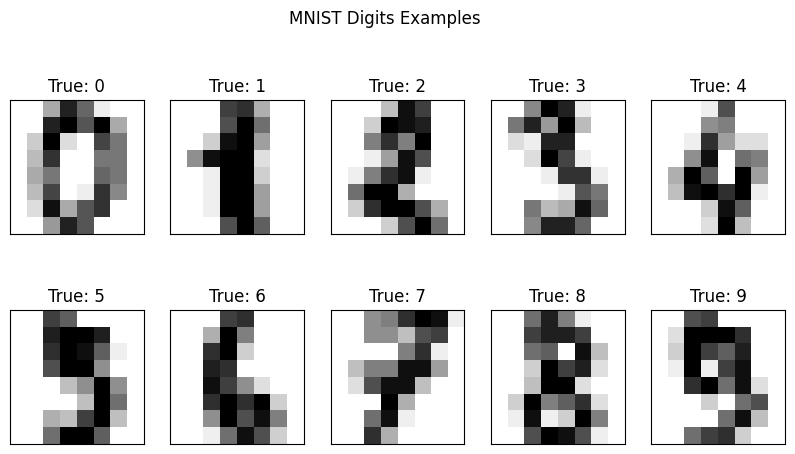

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='binary', interpolation='nearest')
    ax.set_title(f'True: {y[i]}')
plt.suptitle("MNIST Digits Examples", y=1.02)
plt.show()

KMeans ÁÆóÊ≥ïÊòØÂü∫‰∫éË∑ùÁ¶ªËÆ°ÁÆóÁöÑ„ÄÇÈúÄË¶ÅÊ†áÂáÜÂåñ„ÄÇ

## Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
print("Ê†áÂáÜÂåñÂêéÊï∞ÊçÆÂΩ¢Áä∂:", X_scaled.shape)
print("Ê†áÂáÜÂåñÂêéÊï∞ÊçÆÁ§∫‰æã (Ââç10‰∏™ÁâπÂæÅ):", X_scaled[0, :10])

Ê†áÂáÜÂåñÂêéÊï∞ÊçÆÂΩ¢Áä∂: (1797, 64)
Ê†áÂáÜÂåñÂêéÊï∞ÊçÆÁ§∫‰æã (Ââç10‰∏™ÁâπÂæÅ): [ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926]


In [7]:
n_components_pca = 30   

pca = PCA(n_components=n_components_pca, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA ÈôçÁª¥Âà∞ {n_components_pca} Áª¥ÂêéÊï∞ÊçÆÂΩ¢Áä∂:", X_pca.shape)

PCA ÈôçÁª¥Âà∞ 30 Áª¥ÂêéÊï∞ÊçÆÂΩ¢Áä∂: (1797, 30)


In [8]:
explained_variance_ratio = pca.explained_variance_ratio_.sum() #ÊØè‰∏™‰∏ªÊàêÂàÜÁöÑÊñπÂ∑ÆË¥°ÁåÆÁéá
print(f"PCA Ëß£ÈáäÁöÑÊÄªÊñπÂ∑ÆÊØî‰æã: {explained_variance_ratio:.4f}")

PCA Ëß£ÈáäÁöÑÊÄªÊñπÂ∑ÆÊØî‰æã: 0.8932


Ëß£ÈáäÊñπÂ∑ÆÊòØÊåáPCA‰∏≠ÊØè‰∏™‰∏ªÊàêÂàÜËß£ÈáäÁöÑÂéüÂßãÊï∞ÊçÆÊñπÂ∑ÆÁöÑÊØî‰æã„ÄÇÂÆÉË°®Á§∫ÊØè‰∏™‰∏ªÊàêÂàÜÂØπÂéüÂßãÊï∞ÊçÆÁöÑË¥°ÁåÆÂ∫¶„ÄÇ

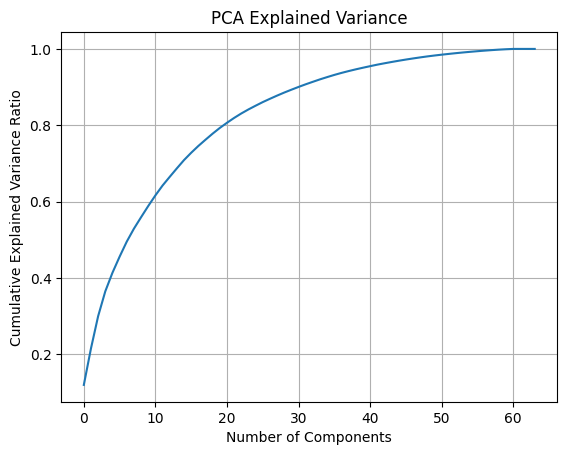

In [9]:
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

## ËÅöÁ±ª

In [10]:
n_clusters_kmeans = 10

kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init=10)
kmeans.fit(X_pca)

clusters = kmeans.labels_

centroids = kmeans.cluster_centers_

print("ËÅöÁ±ªÂÆåÊàê„ÄÇ")
print("Ââç 10 ‰∏™Ê†∑Êú¨ÁöÑËÅöÁ±ªÊ†áÁ≠æ:", clusters[:10])
print("ËÅöÁ±ª‰∏≠ÂøÉÁÇπÂΩ¢Áä∂:", centroids.shape) # Â∫îËØ•ÊòæÁ§∫ (10, n_components_pca)

ËÅöÁ±ªÂÆåÊàê„ÄÇ
Ââç 10 ‰∏™Ê†∑Êú¨ÁöÑËÅöÁ±ªÊ†áÁ≠æ: [4 0 0 1 3 1 7 5 1 1]
ËÅöÁ±ª‰∏≠ÂøÉÁÇπÂΩ¢Áä∂: (10, 30)


KmeansÂèÇÊï∞Ôºö
- tolÔºàtoleranceÔºâ Á±ªÂûãÔºöfloat ÈªòËÆ§ÂÄºÔºö1e-4 ÊèèËø∞ÔºöÊî∂ÊïõÂÆπÂ∑ÆÔºåÂç≥ÂΩìÁ∞á‰∏≠ÂøÉÁöÑÂèòÂåñÂ∞è‰∫éËØ•ÂÄºÊó∂ÔºåÁÆóÊ≥ïÂÅúÊ≠¢Ëø≠‰ª£
- algorithm Á±ªÂûãÔºö{'auto', 'full', 'elkan'} ÈªòËÆ§ÂÄºÔºö'auto'
  - 'auto'ÔºöËá™Âä®ÈÄâÊã©ÁÆóÊ≥ï„ÄÇ
  - 'full'Ôºö‰ΩøÁî®ÁªèÂÖ∏ k-means ÁÆóÊ≥ï„ÄÇ
  - 'elkan'Ôºö‰ΩøÁî® Elkan ÁÆóÊ≥ïÔºåÈÄöÂ∏∏Êõ¥Âø´‰ΩÜÂèØËÉΩ‰∏çÂ¶ÇÁªèÂÖ∏ÁÆóÊ≥ïÁ®≥ÂÆö„ÄÇ
-  n_init: ËøêË°å KMeans ÁÆóÊ≥ï n_init Ê¨°ÔºåÊØèÊ¨°ÈöèÊú∫ÂàùÂßãÂåñÔºåÊúÄÂêéÈÄâÊã©ÊúÄ‰Ω≥ÁªìÊûú (Èò≤Ê≠¢Èô∑ÂÖ•Â±ÄÈÉ®ÊúÄ‰ºò)

Â±ûÊÄßÔºö
- labels_ÔºöÊØè‰∏™Ê†∑Êú¨ÊâÄÂ±ûÁöÑÁ∞á
- cluster_centers_ÔºöÁ∞á‰∏≠ÂøÉ
- inertia_ÔºöÁ∞áÂÜÖËØØÂ∑ÆÂπ≥ÊñπÂíåÔºåË∂äÂ∞èÁ∞áÂÜÖËØØÂ∑ÆË∂äÂ∞èÔºåË∂äËÅöÊã¢

## ËØÑ‰º∞&ÂèØËßÜÂåñ

ËØÑ‰º∞ËÅöÁ±ªÊïàÊûúÂ∏∏Áî®metircs:
- Homogeneity (ÂêåË¥®ÊÄß): ÊØè‰∏™ËÅöÁ±ªÂè™ÂåÖÂê´Âçï‰∏™Á±ªÂà´ÁöÑÊ†∑Êú¨„ÄÇÈ´ò Homogeneity ÊÑèÂë≥ÁùÄËÅöÁ±ªÂæà‚ÄúÁ∫Ø‚Äù„ÄÇ
- Completeness (ÂÆåÊï¥ÊÄß): Â±û‰∫éÂêå‰∏Ä‰∏™Á±ªÂà´ÁöÑÊ†∑Êú¨ÈÉΩË¢´ÂàÜÂà∞Âêå‰∏Ä‰∏™ËÅöÁ±ª‰∏≠„ÄÇÈ´ò Completeness ÊÑèÂë≥ÁùÄÂêå‰∏Ä‰∏™Á±ªÂà´ÁöÑÊ†∑Êú¨Ê≤°ÊúâË¢´‚ÄúÂàÜÊï£‚Äù„ÄÇ
- V-measure (V Â∫¶Èáè): Homogeneity Âíå Completeness ÁöÑË∞ÉÂíåÂπ≥ÂùáÔºåÁªºÂêàÂèçÊò†ËÅöÁ±ªÊïàÊûú„ÄÇ
- Adjusted Rand Index (ARI): Ë°°Èáè‰∏§‰∏™ËÅöÁ±ªÂàíÂàÜÁªìÊûúÔºà‰Ω†ÁöÑËÅöÁ±ªÁªìÊûúÂíåÁúüÂÆûÊ†áÁ≠æÔºâÁöÑÁõ∏‰ººÂ∫¶ÔºåËÄÉËôë‰∫ÜÈöèÊú∫Âõ†Á¥†„ÄÇARI ÁöÑÂÄºÂú® -1 Âà∞ 1 ‰πãÈó¥Ôºå1 Ë°®Á§∫ÂÆåÁæéÂåπÈÖçÔºå0 Ë°®Á§∫ÈöèÊú∫ËÅöÁ±ª„ÄÇ
- Silhouette Score (ËΩÆÂªìÁ≥ªÊï∞): Ê≥®ÊÑèÔºÅ **Silhouette Score ÊòØÂÜÖÈÉ®ËØÑ‰º∞ÊåáÊ†áÔºåÂÆÉ‰∏ç‰ΩøÁî®ÁúüÂÆûÊ†áÁ≠æ y**„ÄÇÂÆÉË°°ÈáèÊØè‰∏™Ê†∑Êú¨‰∏éÂÖ∂Ëá™Ë∫´ËÅöÁ±ªÂÜÖÁöÑÁÇπÊúâÂ§öÊé•ËøëÔºå‰ª•Âèä‰∏éÊúÄËøëÁöÑÂÖ∂‰ªñËÅöÁ±ªÂÜÖÁöÑÁÇπÊúâÂ§öËøú„ÄÇ Silhouette Score ÁöÑÂÄºÂú® -1 Âà∞ 1 ‰πãÈó¥ÔºåË∂äÊé•Ëøë 1 Ë∂äÂ•Ω„ÄÇÂ¶ÇÊûú**Ê≤°ÊúâÁúüÂÆûÊ†áÁ≠æ y**Ôºå‰Ω†‰ºö‰∏ªË¶Å‰æùËµñ Silhouette Score Êàñ Elbow Method Á≠âÊñπÊ≥ïÊù•ËØÑ‰º∞ÂíåÈÄâÊã© K ÂÄº„ÄÇÂú®Ëøô‰∏™È°πÁõÆÈáåÔºåÊàë‰ª¨Êúâ yÔºåÊâÄ‰ª•‰∏ªË¶Å‰ΩøÁî®ÂâçÈù¢Âá†‰∏™Âü∫‰∫éÊ†áÁ≠æÁöÑÊåáÊ†á„ÄÇ

In [11]:
homogeneity = homogeneity_score(y, clusters)
completeness = completeness_score(y, clusters)
v_measure = v_measure_score(y, clusters)
ari = adjusted_rand_score(y, clusters)

In [12]:
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")

Homogeneity: 0.6083
Completeness: 0.6559
V-measure: 0.6312
Adjusted Rand Index: 0.4764


KmeansÊòØÁ∫øÊÄß„ÄÅÂü∫‰∫éÊ¨ßÊ∞èË∑ùÁ¶ªÁöÑÁÆÄÂçïËÅöÁ±ªÁÆóÊ≥ïÔºåÈù¢ÂØπÊâãÂÜôÊï∞Â≠óËøôÁßçÈùûÁ∫øÊÄß„ÄÅÂàÜÂ∏ÉÂ§çÊùÇÁöÑÊï∞ÊçÆÔºåÊïàÊûúÊúâÈôê„ÄÇ

ËØÑ‰º∞ÊåáÊ†áÁªô‰∫ÜÊàë‰ª¨ÈáèÂåñÁöÑÂàÜÊï∞Ôºå‰ΩÜÊääÊï∞ÊçÆÁÇπÁîªÂá∫Êù•ÁúãÁúãÔºåÁõ¥ËßÇÊÑüÂèó‰∏Ä‰∏ãËÅöÁ±ªÁöÑÊïàÊûú‰πüÈùûÂ∏∏ÈáçË¶ÅÔºÅÁî±‰∫éÊï∞ÊçÆÊòØÈ´òÁª¥ÁöÑ (64Áª¥ÂéüÂßãÊàñ 30Áª¥ PCA)ÔºåÊàë‰ª¨ÈúÄË¶ÅËøõ‰∏ÄÊ≠•ÈôçÁª¥Âà∞ 2D Êàñ 3D ÊâçËÉΩÁîªÂõæ„ÄÇÊúÄÂ∏∏Áî®ÁöÑÊñπÊ≥ïÊòØ PCA (ÈôçÂà∞ 2 Êàñ 3 Áª¥) Âíå t-SNE„ÄÇ

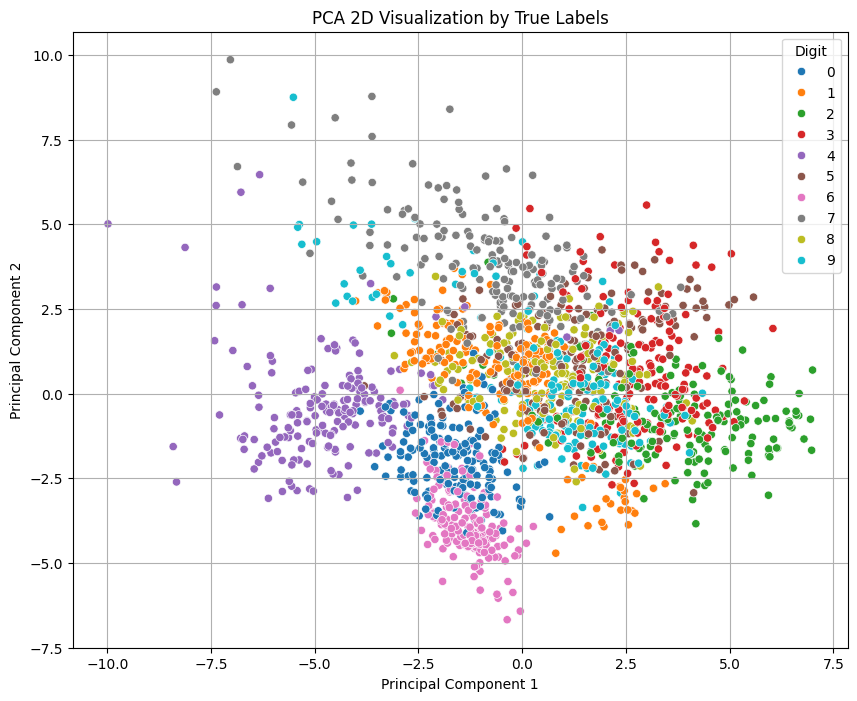

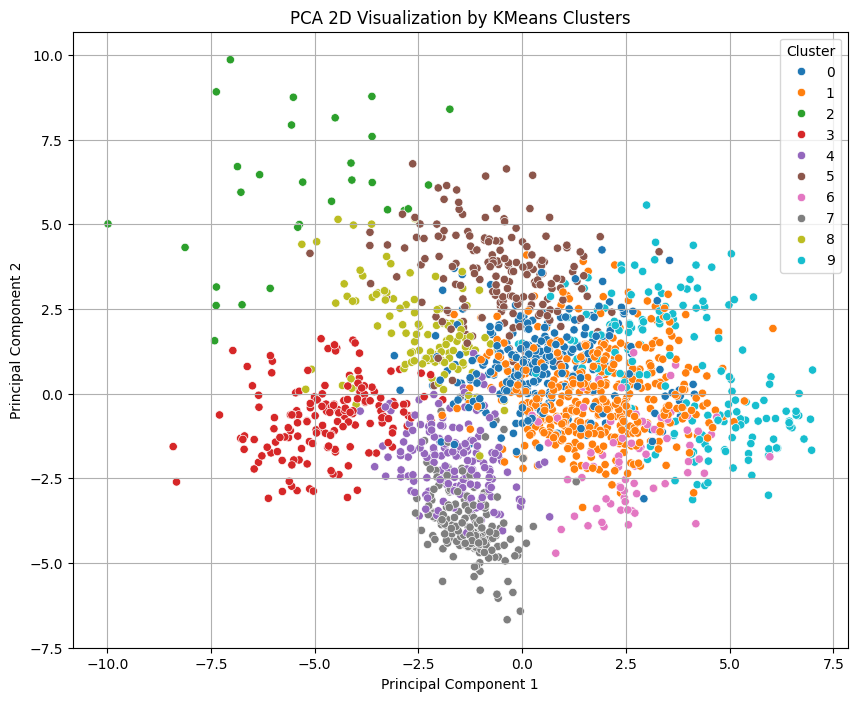

In [13]:
# Â∞ÜÊï∞ÊçÆËøõ‰∏ÄÊ≠•ÈôçÁª¥Âà∞ 2 Áª¥Áî®‰∫éÂèØËßÜÂåñ
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled) # Ê≥®ÊÑèËøôÈáåÊòØÂØπÊ†áÂáÜÂåñÂêéÁöÑÂéüÂßãÊï∞ÊçÆËøõË°å PCA ÈôçÁª¥Âà∞ 2 Áª¥

# ÂèØËßÜÂåñÔºöÊåâÁúüÂÆûÊ†áÁ≠æ‰∏äËâ≤
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='tab10', legend='full')
plt.title('PCA 2D Visualization by True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', loc='best')
plt.grid(True)
plt.show()

# ÂèØËßÜÂåñÔºöÊåâ KMeans ËÅöÁ±ªÁªìÊûú‰∏äËâ≤
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters, palette='tab10', legend='full')
plt.title('PCA 2D Visualization by KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

ÂèØ‰ª•ÂèëÁé∞ËÅöÁ±ªÂíåÁúüÂÆûÁöÑÊ†áÁ≠æÂÆåÂÖ®ÂØπ‰∏ç‰∏äÔºåËøôÊòØÊó†ÁõëÁù£ÁÆóÊ≥ïÁöÑÂøÖÁÑ∂ÁªìÊûú„ÄÇËøôÈáåÈôçÂà∞2Áª¥ÔºåÂØºËá¥ËÅöÁ±ªÊïàÊûú‰∏çÂ•Ω„ÄÇ

t-SNEÔºàt-Distributed Stochastic Neighbor EmbeddingÔºâ ÊòØ‰∏ÄÁßçÈùûÁ∫øÊÄßÈôçÁª¥ÊñπÊ≥ïÔºåÂÆÉÊõ¥ÊìÖÈïø‰øùÁïôÊï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑÂ±ÄÈÉ®ÂÖ≥Á≥ª„ÄÇÂú®ÂèØËßÜÂåñËÅöÁ±ªÁªìÊûúÊó∂Ôºåt-SNE ÈÄöÂ∏∏ËÉΩÊØî PCA Êõ¥Â•ΩÂú∞Â∞Ü‰∏çÂêåÁöÑËÅöÁ±ª/Á±ªÂà´ÂàÜÂºÄÔºå‰ΩøÁ∞áÁöÑËæπÁïåÊõ¥Ê∏ÖÊô∞„ÄÇ‰ΩÜ t-SNE ËÆ°ÁÆóÈáèËæÉÂ§ßÔºåÈÄöÂ∏∏Âú®Â∞ëÈáèÊ†∑Êú¨ÊàñÁªèËøá PCA ÈôçÁª¥ÂêéÁöÑÊï∞ÊçÆ‰∏äËøõË°å„ÄÇ

Ê≠£Âú®ËÆ°ÁÆó t-SNE...
t-SNE ËÆ°ÁÆóÂÆåÊàê„ÄÇ
t-SNE ÈôçÁª¥Âà∞ 2 Áª¥ÂêéÊï∞ÊçÆÂΩ¢Áä∂: (1797, 2)


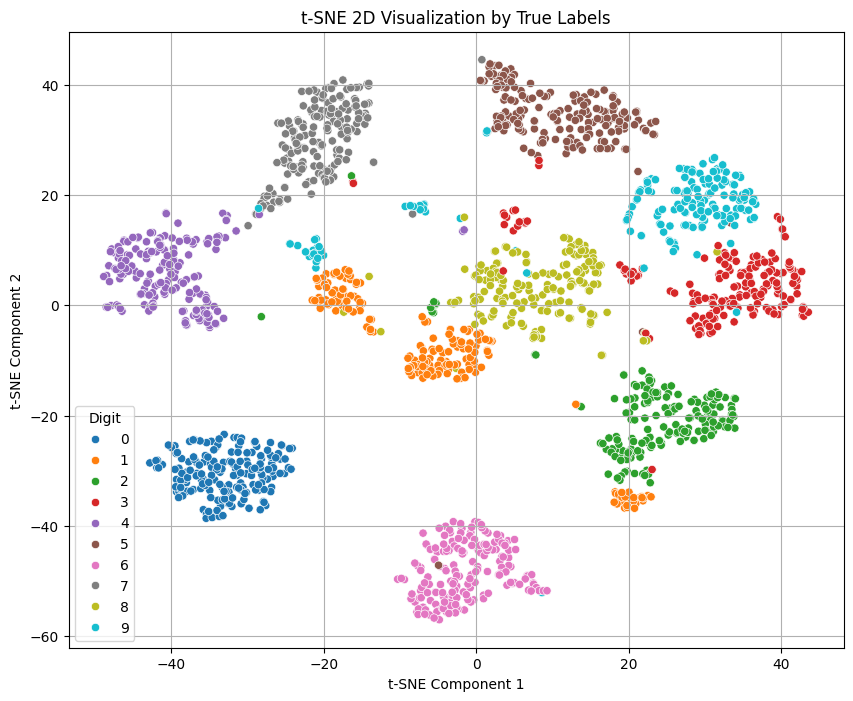

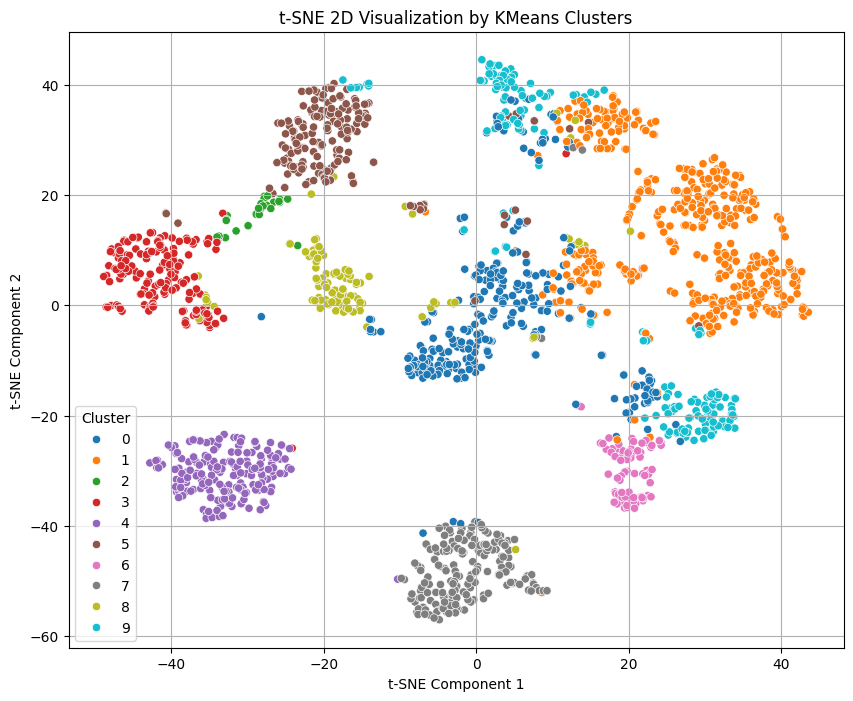

In [14]:
# Áî±‰∫é t-SNE ËÆ°ÁÆóÈáèÂ§ßÔºåÈÄöÂ∏∏Âú®Ê†∑Êú¨ËæÉÂ∞ëÊàñÂ∑≤ÁªèÈôçÁª¥ÁöÑÊï∞ÊçÆ‰∏äËøêË°å„ÄÇ
# ËøôÈáåÊàë‰ª¨Áõ¥Êé•Âú® PCA ÈôçÁª¥Âà∞ 30 Áª¥ÁöÑÊï∞ÊçÆÁöÑ (X_pca) ‰∏äËøêË°å t-SNE

# Ë≠¶ÂëäÔºöt-SNE ËÆ°ÁÆóÂèØËÉΩÈúÄË¶Å‰∏Ä‰∫õÊó∂Èó¥ÔºÅËÄêÂøÉÁ≠âÂæÖ... ‚òïÔ∏è
print("Ê≠£Âú®ËÆ°ÁÆó t-SNE...")

# n_components=2 Ë°®Á§∫ÈôçÂà∞ 2 Áª¥
# init='pca' ‰ΩøÁî® PCA ÁªìÊûúÂàùÂßãÂåñÔºåÊúâÂä©‰∫éÁ®≥ÂÆöÂíåÂä†ÈÄü
# learning_rate='auto' Êàñ‰∏Ä‰∏™ÂÄº (e.g., 200)
# n_iter=300 ÊàñÊõ¥Â§öÔºåËø≠‰ª£Ê¨°Êï∞ÔºåÂΩ±ÂìçÊî∂Êïõ
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_pca) # Âú® PCA ÈôçÁª¥ÂêéÁöÑÊï∞ÊçÆ‰∏äÂ∫îÁî® t-SNE
print("t-SNE ËÆ°ÁÆóÂÆåÊàê„ÄÇ")
print("t-SNE ÈôçÁª¥Âà∞ 2 Áª¥ÂêéÊï∞ÊçÆÂΩ¢Áä∂:", X_tsne.shape)

# ÂèØËßÜÂåñÔºöÊåâÁúüÂÆûÊ†áÁ≠æ‰∏äËâ≤
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', legend='full')
plt.title('t-SNE 2D Visualization by True Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit', loc='best')
plt.grid(True)
plt.show()

# ÂèØËßÜÂåñÔºöÊåâ KMeans ËÅöÁ±ªÁªìÊûú‰∏äËâ≤
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='tab10', legend='full')
plt.title('t-SNE 2D Visualization by KMeans Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

## ÂÖ∂‰ªñËÅöÁ±ªÊ®°ÂûãÔºö 
 
KmeansÂÅáËÆæÂêåÁ±ªÊï∞ÊçÆÂú®Ê¨ßÂá†ÈáåÂæóÁ©∫Èó¥‰∏≠ÊàêÁêÉÁä∂ÂàÜÂ∏É„ÄÇ
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
- ÂéüÁêÜÔºö DBSCAN ÊòØÂü∫‰∫éÂØÜÂ∫¶ÁöÑËÅöÁ±ªÁÆóÊ≥ï„ÄÇÂÆÉÂØªÊâæÊï∞ÊçÆÁÇπÂØÜÈõÜËøûÊé•ÁöÑÂå∫ÂüüÔºåÂπ∂Â∞ÜËøô‰∫õÂå∫ÂüüÂàíÂàÜ‰∏∫Á∞á„ÄÇÂÆÉ‰∏çÂÅáËÆæÁ∞áÊòØÁêÉÂΩ¢ÁöÑÔºåËÄå‰∏îËÉΩÊúâÊïàÂú∞ËØÜÂà´Âá∫Âô™Â£∞ÁÇπÔºà‰∏çÂ±û‰∫é‰ªª‰ΩïÁ∞áÁöÑÁÇπÔºâ„ÄÇ
- Ê†∏ÂøÉÊ¶ÇÂøµÔºö
    - Œµ (epsilon): ‰∏Ä‰∏™Ë∑ùÁ¶ªÈòàÂÄº„ÄÇ‰ª•Êüê‰∏™ÁÇπ‰∏∫ÂúÜÂøÉÔºåÁîª‰∏Ä‰∏™ÂçäÂæÑ‰∏∫ Œµ ÁöÑÂúÜÔºåÁúãÁúãÈáåÈù¢ÊúâÂ§öÂ∞ëÂÖ∂‰ªñÁÇπ„ÄÇ
    - MinPts: ‰∏Ä‰∏™ÁÇπÊï∞ÈòàÂÄº„ÄÇÂ¶ÇÊûú‰∏Ä‰∏™ÁÇπÁöÑ Œµ ÈÇªÂüüÂÜÖÁÇπÊï∞Â§ß‰∫éÁ≠â‰∫é MinPtsÔºåÂÆÉÂ∞±ÊòØÊ†∏ÂøÉÁÇπ (Core Point)„ÄÇ
    - ÂèØËææÊÄß (Reachability): Â¶ÇÊûúÁÇπ B Âú®ÁÇπ A ÁöÑ Œµ ÈÇªÂüüÂÜÖÔºåÂπ∂‰∏îÁÇπ A ÊòØÊ†∏ÂøÉÁÇπÔºåÈÇ£‰πà B ‰ªé A ÊòØÁõ¥Êé•ÂèØËææÁöÑ„ÄÇÂ¶ÇÊûú‰∏ÄÁ≥ªÂàóÁÇπÈÉΩÊòØÂèØËææÁöÑÔºåÈÇ£‰πàÂÆÉ‰ª¨Â∞±Â±û‰∫éÂêå‰∏Ä‰∏™Á∞á„ÄÇ
    - ËæπÁïåÁÇπ (Border Point): Âú®Êüê‰∏™Ê†∏ÂøÉÁÇπÁöÑ Œµ ÈÇªÂüüÂÜÖÔºå‰ΩÜÂÆÉËá™Â∑±‰∏çÊòØÊ†∏ÂøÉÁÇπ„ÄÇËæπÁïåÁÇπÂ±û‰∫éÊ†∏ÂøÉÁÇπÊâÄÂú®ÁöÑÁ∞á„ÄÇ
    - Âô™Â£∞ÁÇπ (Noise Point): Êó¢‰∏çÊòØÊ†∏ÂøÉÁÇπ‰πü‰∏çÊòØËæπÁïåÁÇπ„ÄÇ
- ‰ªÄ‰πàÊó∂ÂÄôÁî®Ôºö Êï∞ÊçÆÈõÜÊúâÊòéÊòæÁöÑ‰∏çËßÑÂàôÂΩ¢Áä∂Á∞áÔºåÊàñËÄÖÂåÖÂê´ÈúÄË¶ÅË¢´ÂøΩÁï•ÁöÑÂô™Â£∞ÁÇπ„ÄÇ
- Áº∫ÁÇπÔºö ÂØπ‰∫éÂØÜÂ∫¶Â∑ÆÂºÇÂæàÂ§ßÁöÑÁ∞áÊïàÊûú‰∏çÂ•ΩÔºåÂØπ Œµ Âíå MinPts ÂèÇÊï∞ÊØîËæÉÊïèÊÑü„ÄÇ   

**Agglomerative Clustering (Â±ÇÊ¨°ËÅöÁ±ª - ÂáùËÅöÂûã)**
- ÂéüÁêÜÔºö ËøôÊòØ‰∏ÄÁßçÂ±ÇÊ¨°ÁöÑËÅöÁ±ªÊñπÊ≥ï„ÄÇÂáùËÅöÂûãÊòØ‰ªé‰∏ãÂæÄ‰∏äÊûÑÂª∫Â±ÇÊ¨°ÁªìÊûÑ„ÄÇÂºÄÂßãÊó∂ÔºåÊØè‰∏™Êï∞ÊçÆÁÇπÈÉΩÊòØ‰∏Ä‰∏™Áã¨Á´ãÁöÑÁ∞á„ÄÇÁÑ∂ÂêéÔºåÁÆóÊ≥ïËø≠‰ª£Âú∞Â∞ÜÊúÄÁõ∏‰ººÁöÑ‰∏§‰∏™Á∞áÂêàÂπ∂ÔºåÁõ¥Âà∞Êª°Ë∂≥ÂÅúÊ≠¢Êù°‰ª∂ÔºàÊØîÂ¶ÇËææÂà∞ÊåáÂÆöÁöÑÁ∞áÊï∞Èáè KÔºåÊàñËÄÖÁ∞á‰πãÈó¥ÁöÑÁõ∏‰ººÂ∫¶‰Ωé‰∫éÊüê‰∏™ÈòàÂÄºÔºâ„ÄÇËøô‰∏™ÂêàÂπ∂ËøáÁ®ãÂèØ‰ª•ÂèØËßÜÂåñ‰∏∫‰∏ÄÊ£µÊ†ëÁä∂Âõæ (Dendrogram)„ÄÇ
- Ê†∏ÂøÉÊ¶ÇÂøµÔºö
    - Áõ∏‰ººÂ∫¶/Ë∑ùÁ¶ªÂ∫¶ÈáèÔºö Â¶Ç‰ΩïËÆ°ÁÆó‰∏§‰∏™Êï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑË∑ùÁ¶ªÔºàÂ¶ÇÊ¨ßÂá†ÈáåÂæóË∑ùÁ¶ªÔºâ„ÄÇ
    - ËøûÊé•ÊñπÂºè (Linkage): Â¶Ç‰ΩïËÆ°ÁÆó‰∏§‰∏™Á∞á‰πãÈó¥ÁöÑË∑ùÁ¶ªÔºàÂõ†‰∏∫Á∞áÈáåÂèØËÉΩÂåÖÂê´Â§ö‰∏™ÁÇπÔºâ„ÄÇÂ∏∏ËßÅÁöÑÊúâÔºö
        - Single Linkage: ‰∏§‰∏™Á∞á‰πãÈó¥Ë∑ùÁ¶ªÊúÄËøëÁöÑ‰∏§‰∏™ÁÇπ‰πãÈó¥ÁöÑË∑ùÁ¶ª„ÄÇÂÆπÊòìÂΩ¢Êàê‚ÄúÈìæ‚ÄùÁä∂Á∞á„ÄÇ
        - Complete Linkage: ‰∏§‰∏™Á∞á‰πãÈó¥Ë∑ùÁ¶ªÊúÄËøúÁöÑ‰∏§‰∏™ÁÇπ‰πãÈó¥ÁöÑË∑ùÁ¶ª„ÄÇÂÄæÂêë‰∫éÂΩ¢ÊàêÁêÉÁä∂Á∞á„ÄÇ
        - Average Linkage: ‰∏§‰∏™Á∞á‰πãÈó¥ÊâÄÊúâÁÇπÂØπÁöÑÂπ≥ÂùáË∑ùÁ¶ª„ÄÇ
        - Ward Linkage: ÂêàÂπ∂‰∏§‰∏™Á∞áÂêéÔºåÊÄªÁöÑÁ∞áÂÜÖÂπ≥ÊñπÂíåÂ¢ûÂä†ÁöÑÊúÄÂ∞èÂåñ„ÄÇÂÄæÂêë‰∫éÂΩ¢ÊàêÂ§ßÂ∞èÁõ∏‰ººÁöÑÁ∞á„ÄÇ
- ‰ªÄ‰πàÊó∂ÂÄôÁî®Ôºö ‰Ω†‰∏çÁ°ÆÂÆöÊúÄ‰Ω≥ÁöÑÁ∞áÊï∞Èáè KÔºåÊàñËÄÖ‰Ω†ÂØπÊï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑÂ±ÇÊ¨°ÂÖ≥Á≥ªÊÑüÂÖ¥Ë∂£„ÄÇ
- Áº∫ÁÇπÔºö ËÆ°ÁÆóÈáèÈÄöÂ∏∏ÊØî KMeans Â§ßÔºàO(n^2) Êàñ O(n^3)ÔºâÔºåÂÜÖÂ≠òÊ∂àËÄó‰πüÂèØËÉΩÊõ¥Â§ßÔºõÂØπÂºÇÂ∏∏ÂÄºÊïèÊÑüÔºàÁâπÂà´ÊòØ Single LinkageÔºâ„ÄÇ

**Gaussian Mixture Models (GMM)**
- ÂéüÁêÜÔºö GMM ÊòØ‰∏ÄÁßçÊ¶ÇÁéáÊ®°ÂûãÔºåÂÆÉÂÅáËÆæÊï¥‰∏™Êï∞ÊçÆÈõÜÊòØÁî± K ‰∏™‰∏çÂêåÁöÑÈ´òÊñØÂàÜÂ∏ÉÔºàÊ≠£ÊÄÅÂàÜÂ∏ÉÔºâ‚ÄúÊ∑∑Âêà‚ÄùÁîüÊàêÁöÑ„ÄÇÊØè‰∏™È´òÊñØÂàÜÂ∏É‰ª£Ë°®‰∏Ä‰∏™Á∞á„ÄÇÁÆóÊ≥ïÁöÑÁõÆÊ†áÊòØÈÄöËøáÊúüÊúõÊúÄÂ§ßÂåñ -(Expectation-Maximization, EM) ÁÆóÊ≥ïÔºåÊâæÂà∞ÊØè‰∏™È´òÊñØÂàÜÂ∏ÉÁöÑÂèÇÊï∞ÔºàÂùáÂÄº„ÄÅÂçèÊñπÂ∑ÆÁü©ÈòµÔºâ‰ª•ÂèäÊØè‰∏™ÂàÜÂ∏ÉÂú®Ê∑∑Âêà‰∏≠ÊâÄÂç†ÁöÑÊùÉÈáç„ÄÇ
- Ê†∏ÂøÉÊ¶ÇÂøµÔºö
    - È´òÊñØÂàÜÂ∏ÉÔºö ÊØè‰∏™Á∞áÁöÑÊï∞ÊçÆÁÇπË¢´ËÆ§‰∏∫Êúç‰ªé‰∏Ä‰∏™Â§öÁª¥Ê≠£ÊÄÅÂàÜÂ∏ÉÔºåÁî±ÂÖ∂ÂùáÂÄºÂíåÂçèÊñπÂ∑ÆÁü©ÈòµÂÆö‰πâÔºàÂçèÊñπÂ∑ÆÁü©ÈòµÂÜ≥ÂÆö‰∫ÜÂàÜÂ∏ÉÁöÑÂΩ¢Áä∂ÂíåÊñπÂêëÔºå‰∏çÂÉè KMeans ÈöêÂê´Âú∞ÂÅáËÆæÊòØÁêÉÂΩ¢ÁöÑÔºâ„ÄÇ
    - Ê∑∑ÂêàÊùÉÈáçÔºö ÊØè‰∏™È´òÊñØÂàÜÂ∏ÉÂú®ÊÄª‰ΩìÊï∞ÊçÆ‰∏≠ÊâÄÂç†ÁöÑÊØî‰æã„ÄÇ
    - EM ÁÆóÊ≥ïÔºö Ëø≠‰ª£ËøáÁ®ã„ÄÇE Ê≠•È™§ÔºöÊ†πÊçÆÂΩìÂâçÁöÑÈ´òÊñØÂàÜÂ∏ÉÂèÇÊï∞ÔºåËÆ°ÁÆóÊØè‰∏™Êï∞ÊçÆÁÇπÂ±û‰∫éÊØè‰∏™Á∞áÁöÑÊ¶ÇÁéáÔºàËΩØÂàÜÈÖçÔºâ„ÄÇM Ê≠•È™§ÔºöÊ†πÊçÆÊï∞ÊçÆÁÇπÂ±û‰∫éÂêÑ‰∏™Á∞áÁöÑÊ¶ÇÁéáÔºåÈáçÊñ∞‰º∞ËÆ°ÊØè‰∏™È´òÊñØÂàÜÂ∏ÉÁöÑÂèÇÊï∞ÂíåÊ∑∑ÂêàÊùÉÈáç„ÄÇÈáçÂ§çÁõ¥Âà∞Êî∂Êïõ„ÄÇ
- ‰ªÄ‰πàÊó∂ÂÄôÁî®Ôºö ‰Ω†ËÆ§‰∏∫‰∏çÂêåÁöÑÁ∞áÊòØÁî±‰∏çÂêåÁöÑÊ¶ÇÁéáÂàÜÂ∏ÉÁîüÊàêÁöÑÔºåÊàñËÄÖ‰Ω†ÈúÄË¶ÅÊï∞ÊçÆÁÇπÂ±û‰∫éÂ§ö‰∏™Á∞áÁöÑÊ¶ÇÁéá‰ø°ÊÅØÔºåÊàñËÄÖÁ∞á‰∏çÊòØÁÆÄÂçïÁöÑÁêÉÂΩ¢„ÄÇ
- Áº∫ÁÇπÔºö ÈúÄË¶ÅÈ¢ÑÂÖàÊåáÂÆö KÔºõÁÆóÊ≥ïÂèØËÉΩÊî∂ÊïõÂà∞Â±ÄÈÉ®ÊúÄ‰ºòÔºõÂØπÂàùÂßãÂÄºÊïèÊÑüÔºõËÆ°ÁÆóÈáèÊØî KMeans Â§ßÔºõÂØπÁª¥Â∫¶Êï∞ÈáèÊØîËæÉÊïèÊÑüÔºàÂçèÊñπÂ∑ÆÁü©ÈòµÂú®È´òÁª¥Êó∂ÂèÇÊï∞ÂæàÂ§öÔºâ„ÄÇ

**Spectral Clustering (Ë∞±ËÅöÁ±ª)**
- ÂéüÁêÜÔºö Ë∞±ËÅöÁ±ªÊòØ‰∏ÄÁßçÂü∫‰∫éÂõæËÆ∫ÁöÑËÅöÁ±ªÊñπÊ≥ï„ÄÇÂÆÉÈ¶ñÂÖàÂ∞ÜÊï∞ÊçÆÁÇπË°®Á§∫‰∏∫‰∏Ä‰∏™ÂõæÔºåÂõæ‰∏≠ÁöÑËäÇÁÇπÊòØÊï∞ÊçÆÁÇπÔºåËæπ‰ª£Ë°®Êï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑÁõ∏‰ººÂ∫¶ÔºàËæπÊùÉÈáçË∂äÂ§ßË∂äÁõ∏‰ººÔºâ„ÄÇÁÑ∂ÂêéÔºåÂÆÉÂà©Áî®ÂõæÁöÑÊãâÊôÆÊãâÊñØÁü©ÈòµËøõË°åÁâπÂæÅÂàÜËß£ÔºàËÆ°ÁÆóÁâπÂæÅÂêëÈáèÔºâÔºåÂ∞ÜÊï∞ÊçÆÁÇπÊäïÂΩ±Âà∞Áî±ÁâπÂæÅÂêëÈáèÊûÑÊàêÁöÑ‰ΩéÁª¥Á©∫Èó¥„ÄÇÊúÄÂêéÔºåÂú®Ëøô‰∏™‰ΩéÁª¥Á©∫Èó¥ÈáåÔºå‰ΩøÁî® KMeansÔºàÊàñÂÖ∂‰ªñÁÆÄÂçïÁöÑËÅöÁ±ªÁÆóÊ≥ïÔºâËøõË°åËÅöÁ±ª„ÄÇ
- Ê†∏ÂøÉÊ¶ÇÂøµÔºö
    - Áõ∏‰ººÂ∫¶Âõæ (Similarity Graph): Ê†πÊçÆÊï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑÁõ∏‰ººÂ∫¶ÊûÑÂª∫ÁöÑÂõæÔºàÂ¶Ç Œµ-ÈÇªËøëÂõæ„ÄÅK-ÈÇªËøëÂõæ„ÄÅÂÖ®ËøûÊé•ÂõæÂä†È´òÊñØÁõ∏‰ººÂ∫¶Ôºâ„ÄÇ
    - ÊãâÊôÆÊãâÊñØÁü©Èòµ (Laplacian Matrix): ‰ªéÁõ∏‰ººÂ∫¶ÂõæÂØºÂá∫ÁöÑ‰∏Ä‰∏™Áü©ÈòµÔºåÂÖ∂ÁâπÂæÅÂêëÈáèÂåÖÂê´‰∫ÜÂõæÁöÑÈáçË¶ÅÁªìÊûÑ‰ø°ÊÅØ„ÄÇ
    - ÂµåÂÖ• (Embedding): Â∞ÜÊï∞ÊçÆÁÇπÊ†πÊçÆÊãâÊôÆÊãâÊñØÁü©ÈòµÁöÑÁâπÂæÅÂêëÈáèÊäïÂΩ±Âà∞‰ΩéÁª¥Á©∫Èó¥„ÄÇ
- ‰ªÄ‰πàÊó∂ÂÄôÁî®Ôºö Êï∞ÊçÆÈõÜÁöÑÁ∞áÂΩ¢Áä∂Â§çÊùÇÔºå‰º†ÁªüÂü∫‰∫éË∑ùÁ¶ªÁöÑÊñπÊ≥ïÈöæ‰ª•Âå∫ÂàÜÔºåÊàñËÄÖ‰Ω†ËÆ§‰∏∫Êï∞ÊçÆÁÇπ‰πãÈó¥Â≠òÂú®Êõ¥ÊäΩË±°ÁöÑËøûÊé•ÂÖ≥Á≥ª„ÄÇ
- Áº∫ÁÇπÔºö ÈúÄË¶ÅÈ¢ÑÂÖàÊåáÂÆö KÔºàÁî®‰∫éÊúÄÂêé‰∏ÄÊ≠•ÁöÑ KMeansÔºâÔºõËÆ°ÁÆóÈáèÂ§ßÔºåÁâπÂà´ÊòØÊûÑÂª∫Áõ∏‰ººÂ∫¶ÂõæÂíåËøõË°åÁâπÂæÅÂàÜËß£ÁöÑÈò∂ÊÆµÔºõÂØπÁõ∏‰ººÂ∫¶ÂõæÁöÑÊûÑÂª∫ÔºàÂ¶Ç‰ΩïÂÆö‰πâÁõ∏‰ººÂ∫¶ÂíåÈÇªÂüüÔºâÂæàÊïèÊÑüÔºõÂÜÖÂ≠òÊ∂àËÄóËæÉÂ§ß„ÄÇ

ËØïËØïGMMÔºàÈ´òÊñØÊ∑∑ÂêàÊ®°ÂûãÔºâÔºöÂÖÅËÆ∏ËΩØËÅöÁ±ªÔºåËÉΩÊãüÂêàÊõ¥Â§çÊùÇÁöÑÂàÜÂ∏É„ÄÇ

In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=42, n_init=10)
gmm_labels = gmm.fit_predict(X_pca)

print("GMM Homogeneity:", homogeneity_score(y, gmm_labels))
print("GMM Completeness:", completeness_score(y, gmm_labels))
print("GMM V-measure:", v_measure_score(y, gmm_labels))
print("GMM ARI:", adjusted_rand_score(y, gmm_labels))

GMM Homogeneity: 0.7025194035335947
GMM Completeness: 0.7519452023697514
GMM V-measure: 0.7263925061011078
GMM ARI: 0.5875601030748054


ÂÜçËØïËØïË∞±ËÅöÁ±ª

In [17]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
sc_labels = sc.fit_predict(X_pca)

print("GMM Homogeneity:", homogeneity_score(y, sc_labels))
print("GMM Completeness:", completeness_score(y, sc_labels))
print("GMM V-measure:", v_measure_score(y, sc_labels))
print("GMM ARI:", adjusted_rand_score(y, sc_labels))

GMM Homogeneity: 0.7934250914255511
GMM Completeness: 0.8422614528565151
GMM V-measure: 0.8171142234714841
GMM ARI: 0.6919196612688875


## Êó†ÁõëÁù£Â≠¶‰π†

**ÈôçÁª¥ (Dimensionality Reduction)** üìâ‚û°Ô∏è‚ú®
*   **ÁõÆÁöÑÔºö** ÂáèÂ∞ëÊï∞ÊçÆÁöÑÁâπÂæÅÊï∞ÈáèÔºåÂêåÊó∂Â∞ΩÈáè‰øùÁïôÊï∞ÊçÆ‰∏≠ÁöÑÈáçË¶Å‰ø°ÊÅØÊàñÁªìÊûÑ„ÄÇ
*   **‰∏∫‰ªÄ‰πàÈúÄË¶ÅÔºö**
    *   Êï∞ÊçÆÁöÑËØÖÂíí (Curse of Dimensionality): È´òÁª¥Êï∞ÊçÆ‰ºöÂØºËá¥ËÆ°ÁÆóÈáèÂâßÂ¢û„ÄÅÊ®°ÂûãÊõ¥ÂÆπÊòìËøáÊãüÂêà„ÄÅÂèØËßÜÂåñÂõ∞ÈöæÁ≠âÈóÆÈ¢ò„ÄÇ
    *   ÂéªÈô§Âô™Â£∞Ôºö Êúâ‰∫õ‰ΩéÊñπÂ∑ÆÁöÑÁª¥Â∫¶ÂèØËÉΩÊòØÂô™Â£∞„ÄÇ
    *   ÁâπÂæÅÊèêÂèñÔºö ÂàõÂª∫Êñ∞ÁöÑ„ÄÅÊõ¥ÁÆÄÊ¥Å„ÄÅÂèØËÉΩÊõ¥ÊúâÊÑè‰πâÁöÑÁâπÂæÅÁªÑÂêà„ÄÇ
    *   ÂèØËßÜÂåñÔºö Â∞ÜÊï∞ÊçÆÈôçÂà∞ 2D Êàñ 3D ÊâçËÉΩÁîªÂõæÂ±ïÁ§∫„ÄÇ
*   **Â∏∏Áî®ÊñπÊ≥ïÔºö**
    *   **PCA (Principal Component Analysis):** ‰∏ªÊàêÂàÜÂàÜÊûê„ÄÇÁ∫øÊÄßÈôçÁª¥ÔºåÂØªÊâæÊï∞ÊçÆÊñπÂ∑ÆÊúÄÂ§ßÁöÑÊñπÂêëÔºåÂ∞ÜÊï∞ÊçÆÊäïÂΩ±Âà∞Ëøô‰∫õÊñπÂêë‰∏ä„ÄÇ‰øùÁïôÊï∞ÊçÆÁöÑÂÖ®Â±ÄÁ∫øÊÄßÁªìÊûÑ„ÄÇ
    *   **t-SNE (t-Distributed Stochastic Neighbor Embedding):** t-ÂàÜÂ∏ÉÈöèÊú∫ÈÇªÂüüÂµåÂÖ•„ÄÇÈùûÁ∫øÊÄßÈôçÁª¥Ôºå‰∏ªË¶ÅÁî®‰∫é**ÂèØËßÜÂåñ**„ÄÇÂÆÉËØïÂõæ‰øùÁïôÊï∞ÊçÆÁÇπ‰πãÈó¥ÁöÑÂ±ÄÈÉ®ÈÇªËøëÂÖ≥Á≥ªÔºåÂú®È´òÁª¥Á©∫Èó¥‰∏≠Áõ∏‰ººÁöÑÁÇπÂú®‰ΩéÁª¥Á©∫Èó¥‰∏≠‰ªçÁÑ∂Áõ∏‰ººÔºåÂèç‰πã‰∫¶ÁÑ∂„ÄÇÂ∏∏Áî®‰∫éÂèØËßÜÂåñËÅöÁ±ªÁªìÊûúÊàñÈ´òÁª¥Êï∞ÊçÆÂàÜÂ∏É„ÄÇ
    *   **UMAP (Uniform Manifold Approximation and Projection):** ÂùáÂåÄÊµÅÂΩ¢ÈÄºËøë‰∏éÊäïÂΩ±„ÄÇ‰πüÊòØÈùûÁ∫øÊÄßÈôçÁª¥ÔºåÁ±ª‰ºº‰∫é t-SNEÔºå‰ΩÜÈÄöÂ∏∏Êõ¥Âø´ÔºåÂπ∂‰∏îÂú®‰øùÁïôÂ±ÄÈÉ®ÁªìÊûÑÁöÑÂêåÊó∂Ôºå‰πüËÉΩÊõ¥Â•ΩÂú∞‰øùÁïôÊï∞ÊçÆÁöÑÂÖ®Â±ÄÁªìÊûÑ„ÄÇ
    *   **Autoencoders (Ëá™ÁºñÁ†ÅÂô®):** ‰∏ÄÁßçÁ•ûÁªèÁΩëÁªúÁªìÊûÑÔºåËÆ≠ÁªÉÊ®°ÂûãÂ∞ÜËæìÂÖ•ÂéãÁº©Âà∞‰ΩéÁª¥**ÁºñÁ†Å**Â±ÇÔºåÂÜç‰ªéÁºñÁ†ÅÂ±ÇÈáçÂª∫ÂéüÂßãËæìÂÖ•„ÄÇÁºñÁ†ÅÂ±ÇÂ∞±ÊòØÊï∞ÊçÆÁöÑ‰ΩéÁª¥Ë°®Á§∫„ÄÇÂèØ‰ª•Â≠¶‰π†Â§çÊùÇÁöÑÈùûÁ∫øÊÄßÈôçÁª¥„ÄÇ

**ÂÖ≥ËÅîËßÑÂàôÊåñÊéò (Association Rule Mining)** üõíüç∫üçº
*   **ÁõÆÁöÑÔºö** ÂèëÁé∞Êï∞ÊçÆÈõÜ‰∏≠‰∏çÂêåÈ°πÁõÆ‰πãÈó¥ÁöÑÊúâË∂£ÂÖ≥Á≥ªÊàñÂÖ≥ËÅîÊÄß„ÄÇÊúÄÁªèÂÖ∏ÁöÑÂ∫îÁî®ÊòØ‚ÄúË¥≠Áâ©ÁØÆÂàÜÊûê‚Äù(Market Basket Analysis)„ÄÇ
*   **ÈóÆÈ¢òÁ§∫‰æãÔºö** È°æÂÆ¢Ë¥≠‰π∞‰∫ÜÂï§ÈÖíÂíåÂ∞øÂ∏ÉÔºåÊòØÂê¶‰πüÁªèÂ∏∏Ë¥≠‰π∞Á∫∏Â∑æÔºü
*   **Â∏∏Áî®ÁÆóÊ≥ïÔºö**
    *   **Apriori ÁÆóÊ≥ïÔºö** ÂèëÁé∞È¢ëÁπÅÈ°πÈõÜÔºàÂú®Êï∞ÊçÆÈõÜ‰∏≠‰∏ÄËµ∑Âá∫Áé∞ÁöÑÈ¢ëÁéáÂæàÈ´òÁöÑÈ°πÁõÆÁªÑÂêàÔºâÔºåÁÑ∂ÂêéÂü∫‰∫éÈ¢ëÁπÅÈ°πÈõÜÁîüÊàêÂÖ≥ËÅîËßÑÂàô„ÄÇ
*   **Ê†∏ÂøÉÊ¶ÇÂøµÔºö**
    *   **ÊîØÊåÅÂ∫¶ (Support):** Êüê‰∏™È°πÈõÜÂú®Êï∞ÊçÆÈõÜ‰∏≠Âá∫Áé∞ÁöÑÈ¢ëÁéá„ÄÇ
    *   **ÁΩÆ‰ø°Â∫¶ (Confidence):** ËßÑÂàô `A -> B` ÁöÑÁΩÆ‰ø°Â∫¶ÊòØÔºåÂú®Ë¥≠‰π∞‰∫Ü A ÁöÑ‰∫§Êòì‰∏≠Ôºå‰πüË¥≠‰π∞‰∫Ü B ÁöÑÊØî‰æã„ÄÇ
    *   **ÊèêÂçáÂ∫¶ (Lift):** ËßÑÂàô `A -> B` ÁöÑÊèêÂçáÂ∫¶ÊòØÔºåÂú®Ë¥≠‰π∞‰∫Ü A ÁöÑÊÉÖÂÜµ‰∏ãË¥≠‰π∞ B ÁöÑÂèØËÉΩÊÄßÔºåÈô§‰ª•Âú®Ê≤°ÊúâË¥≠‰π∞ A ÁöÑÊÉÖÂÜµ‰∏ãË¥≠‰π∞ B ÁöÑÂèØËÉΩÊÄß„ÄÇÂ§ß‰∫é 1 Ë°®Á§∫ A Âíå B ‰∏ÄËµ∑Âá∫Áé∞ÁöÑÊ¶ÇÁéáÈ´ò‰∫éÁã¨Á´ãÂá∫Áé∞ÁöÑÊ¶ÇÁéá„ÄÇ

**ÂºÇÂ∏∏Ê£ÄÊµã (Anomaly Detection) / Á¶ªÁæ§ÁÇπÊ£ÄÊµã (Outlier Detection)** üö®üßê
*   **ÁõÆÁöÑÔºö** ËØÜÂà´Êï∞ÊçÆÈõÜ‰∏≠ÈÇ£‰∫õ‰∏éÂ§ßÂ§öÊï∞Êï∞ÊçÆÁÇπÊòæËëó‰∏çÂêåÁöÑÊ†∑Êú¨ÔºåËøô‰∫õÁÇπÂèØËÉΩÊòØÈîôËØØÊï∞ÊçÆ„ÄÅÊ¨∫ËØàË°å‰∏∫„ÄÅÁ≥ªÁªüÊïÖÈöúÊàñÊñ∞Áé∞Ë±°„ÄÇ
*   **‰∏∫‰ªÄ‰πàÈúÄË¶ÅÔºö** Êï∞ÊçÆÊ∏ÖÊ¥ó„ÄÅÊ¨∫ËØàÊ£ÄÊµã„ÄÅÂÖ•‰æµÊ£ÄÊµã„ÄÅÊïÖÈöúËØäÊñ≠Á≠â„ÄÇ
*   **Â∏∏Áî®ÊñπÊ≥ïÔºö**
    *   **Âü∫‰∫éË∑ùÁ¶ªÁöÑÊñπÊ≥ïÔºö** ËÆ°ÁÆóÊï∞ÊçÆÁÇπ‰∏éÂÖ∂‰ªñÁÇπÁöÑË∑ùÁ¶ªÔºåË∑ùÁ¶ªËøúÁöÑÁÇπÂèØËÉΩÊòØÂºÇÂ∏∏ÁÇπÔºàÂ¶Ç k-ËøëÈÇªË∑ùÁ¶ª„ÄÅÂ±ÄÈÉ®Á¶ªÁæ§Âõ†Â≠ê LOFÔºâ„ÄÇ
    *   **Âü∫‰∫éÂØÜÂ∫¶ÁöÑÊñπÊ≥ïÔºö** Êï∞ÊçÆÁÇπÂë®Âõ¥ÂØÜÂ∫¶ËæÉ‰ΩéÁöÑÂèØËÉΩÊòØÂºÇÂ∏∏ÁÇπÔºàÂ¶Ç **DBSCAN** ‰πüÂèØ‰ª•ËØÜÂà´Âô™Â£∞ÁÇπÔºå**LOF** ‰πüÂ±û‰∫éÊ≠§Á±ªÔºâ„ÄÇ
    *   **Âü∫‰∫éÊ®°ÂûãÁöÑÊñπÊ≥ïÔºö** ËÆ≠ÁªÉ‰∏Ä‰∏™Ê®°ÂûãÊù•ÊèèËø∞‚ÄúÊ≠£Â∏∏‚ÄùÊï∞ÊçÆÁöÑÂàÜÂ∏ÉÔºåÁÑ∂ÂêéÂ∞ÜÂÅèÁ¶ªËøô‰∏™Ê®°ÂûãÁöÑÁÇπËßÜ‰∏∫ÂºÇÂ∏∏ÔºàÂ¶Ç **One-Class SVM**, **Isolation Forest**, Âü∫‰∫éËá™ÁºñÁ†ÅÂô®ÁöÑÊñπÊ≥ïÔºâ„ÄÇ

**ÂØÜÂ∫¶‰º∞ËÆ° (Density Estimation)** üìàüèûÔ∏è
*   **ÁõÆÁöÑÔºö** ‰º∞ËÆ°Êï∞ÊçÆÂú®Ê†∑Êú¨Á©∫Èó¥ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞„ÄÇÁÆÄÂçïÊù•ËØ¥ÔºåÂ∞±ÊòØÊâæÂá∫Êï∞ÊçÆÂú®Âì™ÈáåÊØîËæÉ‚ÄúÂØÜÈõÜ‚ÄùÔºåÂú®Âì™ÈáåÊØîËæÉ‚ÄúÁ®ÄÁñè‚Äù„ÄÇ
*   **‰∏∫‰ªÄ‰πàÈúÄË¶ÅÔºö** ÁêÜËß£Êï∞ÊçÆÂàÜÂ∏É„ÄÅÂºÇÂ∏∏Ê£ÄÊµãÔºàÂØÜÂ∫¶‰ΩéÁöÑÂå∫ÂüüÊòØÂºÇÂ∏∏Ôºâ„ÄÅÊï∞ÊçÆÁîüÊàêÔºàÂ≠¶‰π†Êï∞ÊçÆÁöÑÂàÜÂ∏ÉÂêéÂèØ‰ª•ÁîüÊàêÁ±ª‰ººÁöÑÊñ∞Êï∞ÊçÆÔºâ„ÄÇ
*   **Â∏∏Áî®ÊñπÊ≥ïÔºö**
    *   **Áõ¥ÊñπÂõæ (Histogram):** ÊúÄÁÆÄÂçïÁöÑÂØÜÂ∫¶‰º∞ËÆ°„ÄÇ
    *   **Ê†∏ÂØÜÂ∫¶‰º∞ËÆ° (Kernel Density Estimation - KDE):** Áî®Âπ≥ÊªëÁöÑÊ†∏ÂáΩÊï∞Êù•‰º∞ËÆ°Ê¶ÇÁéáÂØÜÂ∫¶ÔºåÂæóÂà∞‰∏Ä‰∏™ËøûÁª≠ÁöÑÂØÜÂ∫¶Êõ≤Èù¢„ÄÇ
    *   **È´òÊñØÊ∑∑ÂêàÊ®°Âûã (GMM):** GMM ‰∏ç‰ªÖÂèØ‰ª•Áî®‰∫éËÅöÁ±ªÔºå‰πüÂèØ‰ª•‰Ωú‰∏∫‰∏ÄÁßçÂº∫Â§ßÁöÑÂØÜÂ∫¶‰º∞ËÆ°ÊñπÊ≥ïÔºåÂÆÉÂ∞ÜÂ§çÊùÇÁöÑÊï∞ÊçÆÂàÜÂ∏ÉÂª∫Ê®°‰∏∫Â§ö‰∏™È´òÊñØÂàÜÂ∏ÉÁöÑÊ∑∑Âêà„ÄÇ

**Êï∞ÊçÆÁîüÊàê (Data Generation) / Ë°®Á§∫Â≠¶‰π† (Representation Learning)** üé®üñºÔ∏èüíª
*   **ÁõÆÁöÑÔºö** Â≠¶‰π†Êï∞ÊçÆÁöÑÂÜÖÂú®ÁªìÊûÑÔºåÂπ∂ËÉΩÂ§üÁîüÊàêÊñ∞ÁöÑ„ÄÅ‰∏éÂéüÂßãÊï∞ÊçÆÁõ∏‰ººÁöÑÊ†∑Êú¨ÔºåÊàñËÄÖÂ≠¶‰π†Âà∞Êï∞ÊçÆÁöÑÊõ¥ÊúâÊÑè‰πâ„ÄÅÊõ¥Á¥ßÂáëÁöÑË°®Á§∫ÔºàRepresentationÔºâ„ÄÇ
*   **Â∏∏Áî®ÊñπÊ≥ïÔºö**
    *   **Generative Adversarial Networks (GANs):** ÁîüÊàêÂØπÊäóÁΩëÁªú„ÄÇÁî±‰∏Ä‰∏™ÁîüÊàêÂô®Âíå‰∏Ä‰∏™Âà§Âà´Âô®ÁªÑÊàêÔºå‰∫íÁõ∏ÂçöÂºàÔºåÊúÄÁªàÁîüÊàêÂô®ËÉΩÁîüÊàêÈÄºÁúüÁöÑÊñ∞Êï∞ÊçÆ„ÄÇ
    *   **Variational Autoencoders (VAEs):** ÂèòÂàÜËá™ÁºñÁ†ÅÂô®„ÄÇ‰∏ÄÁßçÁîüÊàêÊ®°ÂûãÔºåÂèØ‰ª•Â≠¶‰π†Êï∞ÊçÆÁöÑÊΩúÂú®Á©∫Èó¥ÔºåÂπ∂‰ªéËøô‰∏™ÊΩúÂú®Á©∫Èó¥ÈááÊ†∑ÁîüÊàêÊñ∞Êï∞ÊçÆ„ÄÇ
    *   **Ëá™ÁºñÁ†ÅÂô® (Autoencoders):** Èô§‰∫ÜÈôçÁª¥ÔºåËá™ÁºñÁ†ÅÂô®ÁöÑÁºñÁ†ÅÂ±ÇÂ≠¶‰π†Âà∞ÁöÑ‚ÄúÁºñÁ†Å‚ÄùÂ∞±ÊòØÊï∞ÊçÆÁöÑ‰ΩéÁª¥Ë°®Á§∫„ÄÇ

**ÁâπÂæÅÂ≠¶‰π† (Feature Learning) / ÁâπÂæÅÊèêÂèñ (Feature Extraction)** üîçüß†
*   **ÁõÆÁöÑÔºö** Ëá™Âä®‰ªéÂéüÂßãÊï∞ÊçÆ‰∏≠Â≠¶‰π†ÊàñÊèêÂèñÊõ¥ÊúâÁî®„ÄÅÊõ¥Êúâ‰ø°ÊÅØÈáè„ÄÅÊõ¥ÊäΩË±°ÁöÑÁâπÂæÅÔºåËÄå‰∏çÊòØÊâãÂä®ËøõË°åÁâπÂæÅÂ∑•Á®ã„ÄÇ
*   **Â∏∏Áî®ÊñπÊ≥ïÔºö**
    *   **PCA:** ÊèêÂèñÂéüÂßãÁâπÂæÅÁöÑÁ∫øÊÄßÁªÑÂêà‰Ωú‰∏∫Êñ∞ÁâπÂæÅÔºà‰∏ªÊàêÂàÜÔºâ„ÄÇ
    *   **Autoencoders:** ÁºñÁ†ÅÂ±ÇÁöÑËæìÂá∫Â∞±ÊòØÂ≠¶‰π†Âà∞ÁöÑ‰ΩéÁª¥ÁâπÂæÅË°®Á§∫„ÄÇ
    *   **Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã (ÁâπÂà´ÊòØÊó†ÁõëÁù£È¢ÑËÆ≠ÁªÉ):** Âú®Â§ßËßÑÊ®°Êó†Ê†áÁ≠æÊï∞ÊçÆ‰∏äËÆ≠ÁªÉ‰∏Ä‰∏™Ê∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºàÂ¶ÇÂç∑ÁßØÁ•ûÁªèÁΩëÁªú CNN Áî®‰∫éÂõæÂÉèÔºåTransformer Áî®‰∫éÊñáÊú¨ÔºâÔºåÊ®°ÂûãÁöÑ‰∏≠Èó¥Â±ÇÂ≠¶Âà∞ÁöÑÊøÄÊ¥ªÂÄºÂèØ‰ª•‰Ωú‰∏∫ÂêéÁª≠‰ªªÂä°ÔºàÂ¶ÇÂàÜÁ±ª„ÄÅËÅöÁ±ªÔºâÁöÑÁâπÂæÅ„ÄÇ